<div style="color: magenta; font-family: Arial; font-size: 26px; font-weight: bold;">
    Sprint 8.01
</div>
<br>

**Visualitzacions en Python**
<br>
<br>

<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

*Pasos:*

1. Conectar Python y MySQL Workbench: Se ejecuta el comando "pip install mysql-connector-python" para instalar el conector "mysql-connector-python". 
2. Establecemos una conexion con la base de datos atraves de una función en python logramos extraer de forma innata las tablas y datos según el orden de origen, el mismo codigo provee el cierre de conexión para segurar el consumo adicional de recursos.

In [4]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='sprint4',
                                         user='root',
                                         password='7829')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


Connected to MySQL Server version  8.0.39
You're connected to database:  ('sprint4',)
MySQL connection is closed


3. Instalamos las librerías en la terminal y las importamos:  

pip install pandas  
pip install numpy  
pip install seaborn  
pip install matplotlib  
pip install sqlalchemy

In [3]:
# Importamos las liberías:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy 



In [5]:
# Importamos las tablas:
import mysql.connector
db = mysql.connector.connect(host='localhost',
                            database='sprint4',
                            user='root',
                            password='7829')


def load_table_to_dataframe(db, cursor, table_name):             # Cargo c/tabla en un Pandas DataFrame.                                                     
    try:
        df = pd.DataFrame()                                      # Creo un DataFrame vacío para la tabla
        cursor.execute(f"SELECT * FROM {table_name}")            # Ejecuto la consulta para extraer tablas
        column_names = [col[0] for col in cursor.description]    # Obtengo los nombres de las columnas
        data = cursor.fetchall()
        data_list = []                                           # Convierto los datos a un formato Dataframe
        for row in data:
            data_list.append(list(row))
        df = pd.DataFrame(data_list, columns=column_names)       # Creo el DataFrame (datos y nombres de columnas)
        return df
    except Exception as e:
        print(f"Error loading table '{table_name}':", e)
        return None

cursor = db.cursor()
cursor.execute("SHOW TABLES")
tables = [tabla[0] for tabla in cursor.fetchall()]

for table_name in tables:
    df_name = f"df_{table_name.lower()}"  # Convierto el nombre de la tabla a minúsculas con prefijo 'df_'
    df = load_table_to_dataframe(db, cursor, table_name)
    if df is None:
        continue

    globals()[df_name] = df  # Creo una variable global con el nombre dinámico y configuro en el DataFrame
    print(f"DataFrame: {df_name}")  # Imprimo el nombre del DataFrame
    
cursor.close()  # Desconexión
db.close()


DataFrame: df_card_status
DataFrame: df_companies
DataFrame: df_credit_cards
DataFrame: df_products
DataFrame: df_transaction_products
DataFrame: df_transactions
DataFrame: df_users


In [34]:
# Verificación de qué tenemos en los DFs:
 
df_card_status.info()
df_companies.info()
df_credit_cards.info()
df_products.info()
df_transaction_products.info()
df_transactions.info()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  275 non-null    object
 1   Status   275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             275 non-null    obj

In [35]:
# Para verificar si los datos están cargados, verifico la estructura de 'products', por ejemplo:

df_products.info() # type: ignore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    object
 1   product_name  100 non-null    object
 2   price         100 non-null    object
 3   colour        100 non-null    object
 4   weight        100 non-null    object
 5   warehouse_id  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [36]:
# Probando visualizaciones, en panda:

df_products

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1,WH-4
1,10,Karstark Dorne,119.52,#f4f4f4,2.4,WH--5
2,100,south duel,40.43,#6d6d6d,3,WH--95
3,11,Karstark Dorne,49.70,#141414,2.7,WH--6
4,12,duel Direwolf,181.60,#a8a8a8,2.1,WH--7
...,...,...,...,...,...,...
95,95,riverlands north Direwolf,6.90,#c1c1c1,2.7,WH--90
96,96,dooku solo,20.92,#282828,2.1,WH--91
97,97,jinn Winterfell,65.25,#bababa,1,WH--92
98,98,Direwolf Littlefinger,38.33,#bababa,2,WH--93


In [6]:
# Resumen de la estructura de 'transactions':

df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    object        
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 46.0+ KB


In [8]:
# Primeras filas de 'transaction_products':

df_transaction_products.head(10)

,id,transaction_id,product_id
0,1,2F499B4D-4DC7-B337-010D-8B7471812A80,1
1,2,6ADF86D5-DD32-BC6F-D157-8C836F5BEF67,1
2,3,D3470F3E-9683-799A-40F1-E42C143BAC5A,1
3,4,EAE19DC1-C847-6D79-673D-00E7696AC336,1
4,5,CDCDE7A5-39CD-9ABD-59D5-71641582C825,1
5,6,CDCDE7A5-39CD-9ABD-59D5-71641582C825,13
6,7,CDCDE7A5-39CD-9ABD-59D5-71641582C825,67
7,8,CDCDE7A5-39CD-9ABD-59D5-71641582C825,11
8,9,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,1
9,10,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,13


<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
<div style="color: magenta; font-family: Arial; font-size: 16px; font-weight: bold;">
    Ejercicio 1
</div>

**Una variable numèrica**

*Pasos:*  
Creo un histograma, con el nombre de "Distribución de los montos de las transacciones", en donde se permite visualizar la distribución de una variable numérica, mostrando la frecuencia de los datos en intervalos específicos.  
    - plt.hist crea un histograma de la columna amount.  
    - bins=15 define el número de intervalos en los que se agrupan los datos.  
    - Se añade una línea para mostrar el promedio y una leyenda para mostrar el dato.  
    - Se añaden títulos y etiquetas para una mejor comprensión del gráfico.  

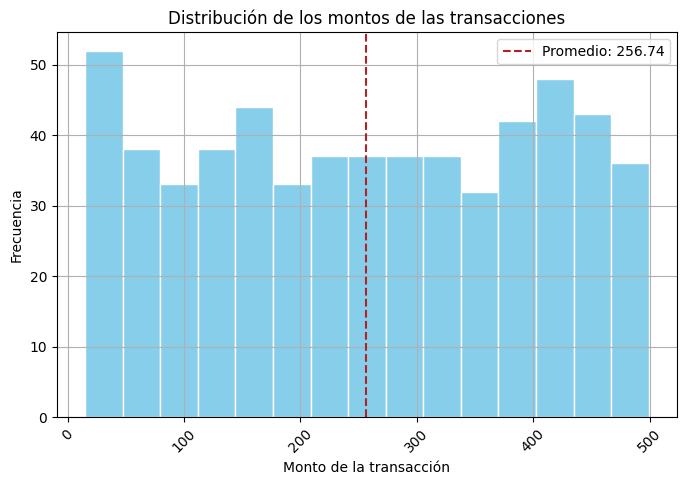

In [7]:
import matplotlib.pyplot as plt

# Crear el histograma
plt.figure(figsize=(8, 5))
plt.hist(df_transactions['amount'], bins=15, color='skyblue', edgecolor='white')

amount = df_transactions['amount']
mean_value = amount.mean()
plt.axvline(mean_value, color='firebrick', linestyle='--', linewidth=1.5, label=f"Promedio: {mean_value:.2f}")
plt.legend()

plt.title('Distribución de los montos de las transacciones')
plt.xlabel('Monto de la transacción')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45, ha='center')
plt.grid(True)

plt.show()



*Análisis:*  

En el histograma hay una distribución relativamente uniforme en los montos de las transacciones, ya que las alturas de las barras son muy parecidas. El promedio de los montos es de 259,01 euros.

Se puede ver una ligera disminución en la frecuencia de transacciones para montos entre 100 y 200 euros. Estaría bien investigar las causas de esto, considerando posibles restricciones en compras a partir de ciertos montos o preferencias específicas de los clientes. Se podría analizar si se pueden ofrecer incentivos o ajustar precios para aumentar las ventas allí.  

También se puede ver que hay diferencias considerables en los montos de las transacciones, lo que refleja una amplia gama de precios en los productos y en las combinaciones de artículos comprados en cada transacción.

<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
<div style="color: magenta; font-family: Arial; font-size: 16px; font-weight: bold;">
    Ejercicio 2
</div>

**Dues variables numèriques**

*Pasos:*  
Primero he tenido que transformar el tipo de price a float
Se extraen las columnas 'price' y 'weight' del DataFrame products, pues serán las que utilizaremos en la gráfica de 'scatter' a través de "plt.scatter"
Se configuran las etiquetas y colores para finalmente generar la gráfica.

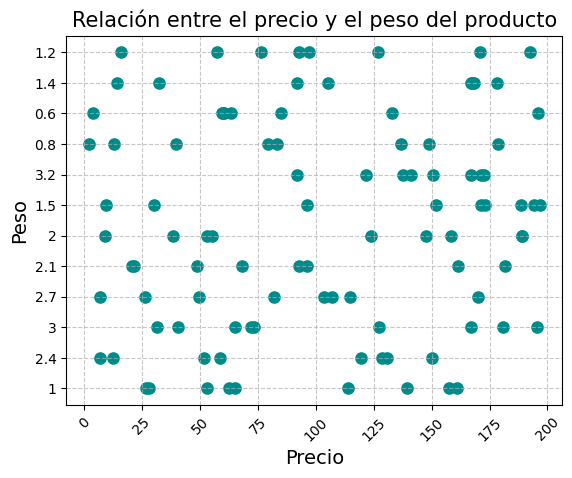

In [8]:
df_products['price'] = df_products['price'].astype(float)

price = df_products['price']
weight = df_products['weight']

plt.scatter(x=price, y=weight, color='darkcyan', s=65)  

plt.xlabel('Precio', fontsize=14)    
plt.ylabel('Peso', fontsize=14)     
plt.title("Relación entre el precio y el peso del producto", fontsize=15)   

plt.grid(True, linestyle='--', alpha=0.7)  
plt.xticks(rotation=45, ha='center')

plt.show()

*Análisis:*  
La idea detrás de esta gráfica de dispersión era averiguar si existía algún tipo de relación entre el peso y el precio de los productos.

La gráfica muestra que los precios y el peso de los productos no tienen una relación clara: hay productos con pesos similares pero precios distintos. Esto sugiere que el precio depende de otros factores (como la marca o los materiales), más que del peso.  
Esto sugiere que el peso no es el factor principal que determina el precio; es probable que intervengan otras características al establecer el valor de cada producto.

<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
<div style="color: magenta; font-family: Arial; font-size: 16px; font-weight: bold;">
    Ejercicio 3
</div>

**Una variable categòrica**

*Pasos:*  
Primero calculo cuántas empresas hay en cada país a partir de la columna correspondiente.    
Construir el gráfico de barras: Se traza una barra por cada país, con su respectiva cantidad de empresas.  
Etiqueto las barras: Se añaden en cada barra los números que indican cuántas empresas corresponden a ese país.  
Asigno un título general y las etiquetas de los ejes, indicando qué representa cada uno.  
Inclin los nombres de los países en 45º para que no se superpongan y se lea mejor.


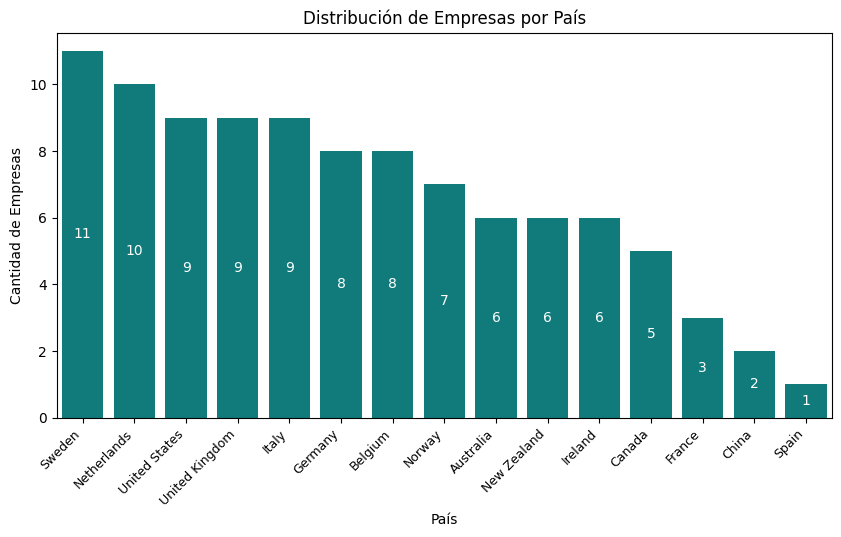

In [ ]:
pais_counts = df_companies['country'].value_counts()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=pais_counts.index, y=pais_counts.values, color= 'darkcyan')
for container in ax.containers:ax.bar_label(container, fmt='%d', label_type='center', color='white', fontsize=10)

plt.title('Distribución de Empresas por País')
plt.xlabel('País')
plt.ylabel('Cantidad de Empresas')
plt.xticks(rotation=45, ha='right', fontsize=9)

plt.show()

*Análisis:*  

A partir del gráfico de barras se puede destacar que Suecia tiene la mayor cantidad de empresas con las que se realizan transacciones. En segundo lugar se posiciona Países Bajos. En el otro extremo se tiene a España como el país con menor cantidad de empresas con las que se realizan transacciones y luego China. Esto podría deberse a que son mercados de reciente incorporación para los productos que se comercializan y por ello pocas empresas compradoras.  

Convendría analizar por qué en determinados países la cifra de empresas es menor y diseñar estrategias específicas (alianzas, marketing local, etc.) para aumentar la representación en esos mercados. Si es posible, seguir las mismas estrategias que siguen los países con más transacciones.

A futuro y a fin de cambiar esta configuración se podría participar en ferias comerciales y buscar realizar acuerdos comerciales con nuevas empresas en aquellos mercados para así aumentar el portafolio de clientes y por ende participación en las ventas de aquellos países.

<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
<div style="color: magenta; font-family: Arial; font-size: 16px; font-weight: bold;">
    Ejercicio 4
</div>

**Una variable categòrica i una numèrica**

*Pasos*  
Uno mi DataFrame de transacciones con el de compañías, tomando la columna “country” de df_companies.  
Convierto la columna “amount” a tipo numérico para poder operar con sus valores.  
Agrupo las transacciones por país y sumo los montos para obtener las ventas totales por cada uno.  
Ordeno esos resultados de menor a mayor.  
Ajusto el tamaño de la figura y trazo un gráfico de barras que muestra las ventas totales por país.  
Configuro las etiquetas de los ejes y la rotación del eje X.


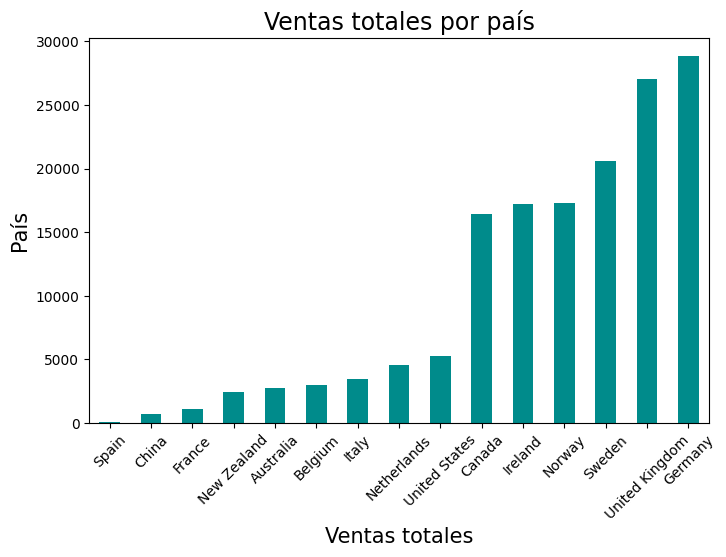

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

companies_transactions = df_transactions.merge(df_companies[['id','country']], left_on='business_id', right_on='id')

df_transactions['amount'] = pd.to_numeric(df_transactions['amount'], errors='coerce')
ventas_pais = companies_transactions.groupby('country')['amount'].sum()  
ventas_pais = ventas_pais.sort_values(ascending=True)         

plt.figure(figsize=(8,5))          
ventas_pais.plot(kind='bar', color= 'darkcyan')  
plt.xlabel('Ventas totales', fontsize=15)
plt.ylabel('País', fontsize=15)

plt.title('Ventas totales por país', fontsize=17)
plt.xticks(rotation=45)

plt.show()


*Análisis:*  

Esta gráfica de barras es parecida a la anterior, tanto España como China fueron los países con menores ventas dentro de todos los países a los que se vende. Se puede observar una correlación positiva entre la cantidad de empresas por país y las ventas por país, resultado que tiene mucha lógica.

En el otro extremo se encuentran Alemania y el Reíno Unido, países a los que se vende por montos totales de entre 25.000 y 30.000 euros; siendo los mercados más importantes en la actualidad.

De la misma forma que en cuanto al número de empresas por país, en cuanto a las ventas se sugiere invertir más en campañas de marketing y acuerdos con empresas de España y China para incrementar las ventas. A futuro, conviene reforzar la oferta en países con mayor potencial y analizar las razones por las que algunos mercados presentan ventas más bajas, para trazar estrategias específicas de crecimiento.

<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
<div style="color: magenta; font-family: Arial; font-size: 16px; font-weight: bold;">
    Ejercicio 5
</div>

**Dues variables categòriques**

*Pasos*  

Se utilizan los campos 'declined' y 'país' de las tablas 'transactions' y 'companies', respectivamente.

Se generará un gráfico de barras apilado (stacked bar chart).  
Agrupo por país el conteo de las transacciones aceptadas y rechazadas y almacenando el resultado en 'data_agrupada'. Reutilizo el DataFrame 'companies_transactions', generado por un merge en el ejercicio anterior.  
Se genera el gráfico de barras apilado y se le da el formato siguiendo el mismo patrón que he utilizado hasta ahora.

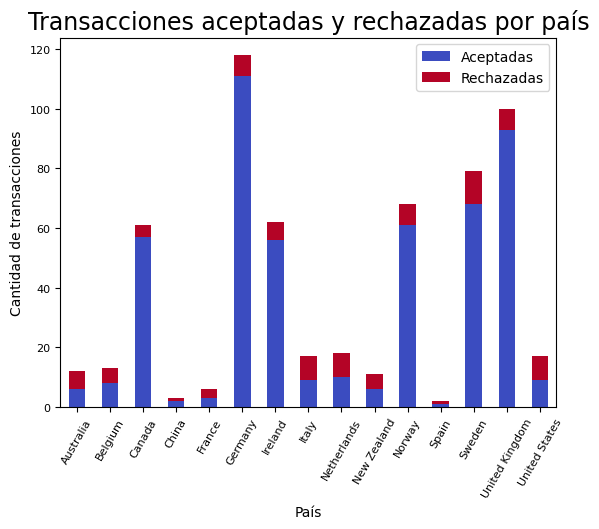

In [17]:
data_agrupada = companies_transactions.groupby('country')['declined'].value_counts().unstack()

data_agrupada.columns = ['Aceptadas', 'Rechazadas']  

data_agrupada.plot(kind='bar', stacked=True, fontsize=8, colormap ='coolwarm' )  

plt.title('Transacciones aceptadas y rechazadas por país', fontsize=17)
plt.xlabel('País')
plt.ylabel('Cantidad de transacciones')
plt.xticks(rotation=60)  

plt.show()

*Análisis:*  



<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
<div style="color: magenta; font-family: Arial; font-size: 16px; font-weight: bold;">
    Ejercicio 6
</div>

**Tres variables**

*Pasos:*  

